# Citi Bike Analysis

## Cleaning

In [4]:
import pandas as pd

In [8]:
# Source: https://s3.amazonaws.com/tripdata/index.html

def get_bikedata(month_nums):
    path = "/Users/melanieackerman/Metis/Project 1 MTA/Project Data/{}-citibike-tripdata.csv"
    dfs = []
    for month_num in month_nums:
        file_path = path.format(month_num)
        dfs.append(pd.read_csv(file_path))
    return pd.concat(dfs)

month_nums1 = [202001, 202002, 202003, 202004, 202005, 202006]
citibike_2020_df = get_bikedata(month_nums1)
#month_nums2 = [202102, 202103, 202104, 202105, 202106]
#citibike_2021_df = get_bikedata(month_nums2)
month_nums3 = [201901, 201902, 201903, 201904, 201905, 201906]
citibike_2019_df = get_bikedata(month_nums3)
#jan = [202101]
#citibike_Jan21_df = get_bikedata(jan)

In [9]:
month_nums2 = [202102, 202103, 202104, 202105, 202106]
citibike_2021_df = get_bikedata(month_nums2)

jan = [202101]
citibike_Jan21_df = get_bikedata(jan)

/var/folders/b6/36rxxyj90cvfwlypjf8jdp_r0000gn/T/ipykernel_14277/3310469866.py:2: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  citibike_2021_df = get_bikedata(month_nums2)
/var/folders/b6/36rxxyj90cvfwlypjf8jdp_r0000gn/T/ipykernel_14277/3310469866.py:2: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  citibike_2021_df = get_bikedata(month_nums2)


In [10]:
citibike_Jan21_df = citibike_Jan21_df.rename(columns={'starttime': 'started_at', 'stoptime': 'ended_at', 'start station name': 'start_station_name', 'start station id': 'start_station_id', 'bikeid': 'ride_id'})

In [11]:
citibike_Jan21_df = citibike_Jan21_df[['started_at', 'ended_at', 'start_station_id', 'start_station_name', 'ride_id']]
citibike_2021_df = citibike_2021_df[['started_at', 'ended_at', 'start_station_id', 'start_station_name', 'ride_id']]

In [12]:
citibike_2021_df = pd.concat([citibike_Jan21_df, citibike_2021_df])
citibike_2021_df.head()

,started_at,ended_at,start_station_id,start_station_name,ride_id
0,2021-01-01 00:00:11.9020,2021-01-01 00:42:05.2260,3581,Underhill Ave & Lincoln Pl,47812
1,2021-01-01 00:00:15.0960,2021-01-01 00:42:14.9780,3581,Underhill Ave & Lincoln Pl,47571
2,2021-01-01 00:00:28.9300,2021-01-01 00:20:36.6510,3144,E 81 St & Park Ave,37451
3,2021-01-01 00:00:32.7130,2021-01-01 00:42:19.3980,3581,Underhill Ave & Lincoln Pl,48884
4,2021-01-01 00:00:35.3650,2021-01-01 00:16:34.6010,534,Water - Whitehall Plaza,26837


In [13]:
citibike_2021_df.tail()

,started_at,ended_at,start_station_id,start_station_name,ride_id
3177512,2021-06-30 13:13:05,2021-06-30 13:25:54,7712.04,Alexander Ave & E 134 St,5CCF02508D6C4209
3177513,2021-06-23 22:51:46,2021-06-23 22:56:56,6450.05,8 Ave & W 31 St,C4D61E2B06185BC1
3177514,2021-06-19 16:18:58,2021-06-19 16:33:32,4354.05,S Portland Ave & Hanson Pl,B58C37145FC92C4B
3177515,2021-06-23 11:29:37,2021-06-23 11:30:59,6450.05,8 Ave & W 31 St,C166DBE51A54FDAE
3177516,2021-06-19 00:54:21,2021-06-19 01:02:39,6450.05,8 Ave & W 31 St,DB56BB2AE0570263


In [14]:
citibike_2019_df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,320,2019-01-01 00:01:47.4010,2019-01-01 00:07:07.5810,3160.0,Central Park West & W 76 St,40.778968,-73.973747,3283.0,W 89 St & Columbus Ave,40.788221,-73.970416,15839,Subscriber,1971,1
1,316,2019-01-01 00:04:43.7360,2019-01-01 00:10:00.6080,519.0,Pershing Square North,40.751873,-73.977706,518.0,E 39 St & 2 Ave,40.747804,-73.973442,32723,Subscriber,1964,1
2,591,2019-01-01 00:06:03.9970,2019-01-01 00:15:55.4380,3171.0,Amsterdam Ave & W 82 St,40.785247,-73.976673,3154.0,E 77 St & 3 Ave,40.773142,-73.958562,27451,Subscriber,1987,1
3,2719,2019-01-01 00:07:03.5450,2019-01-01 00:52:22.6500,504.0,1 Ave & E 16 St,40.732219,-73.981656,3709.0,W 15 St & 6 Ave,40.738046,-73.996430,21579,Subscriber,1990,1
4,303,2019-01-01 00:07:35.9450,2019-01-01 00:12:39.5020,229.0,Great Jones St,40.727434,-73.993790,503.0,E 20 St & Park Ave,40.738274,-73.987520,35379,Subscriber,1979,1


In [15]:
citibike_2020_df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,789,2020-01-01 00:00:55.3900,2020-01-01 00:14:05.1470,504,1 Ave & E 16 St,40.732219,-73.981656,307,Canal St & Rutgers St,40.714275,-73.989900,30326,Subscriber,1992,1
1,1541,2020-01-01 00:01:08.1020,2020-01-01 00:26:49.1780,3423,West Drive & Prospect Park West,40.661063,-73.979453,3300,Prospect Park West & 8 St,40.665147,-73.976376,17105,Customer,1969,1
2,1464,2020-01-01 00:01:42.1400,2020-01-01 00:26:07.0110,3687,E 33 St & 1 Ave,40.743227,-73.974498,259,South St & Whitehall St,40.701221,-74.012342,40177,Subscriber,1963,1
3,592,2020-01-01 00:01:45.5610,2020-01-01 00:11:38.1550,346,Bank St & Hudson St,40.736529,-74.006180,490,8 Ave & W 33 St,40.751551,-73.993934,27690,Subscriber,1980,1
4,702,2020-01-01 00:01:45.7880,2020-01-01 00:13:28.2400,372,Franklin Ave & Myrtle Ave,40.694546,-73.958014,3637,Fulton St & Waverly Ave,40.683239,-73.965996,32583,Subscriber,1982,1


In [16]:
citibike_2019_df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [17]:
citibike_2020_df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [18]:
citibike_2021_df.columns

Index(['started_at', 'ended_at', 'start_station_id', 'start_station_name',
       'ride_id'],
      dtype='object')

In [19]:
citibike_2019_df.info

<bound method DataFrame.info of          tripduration                 starttime                  stoptime  \
0                 320  2019-01-01 00:01:47.4010  2019-01-01 00:07:07.5810   
1                 316  2019-01-01 00:04:43.7360  2019-01-01 00:10:00.6080   
2                 591  2019-01-01 00:06:03.9970  2019-01-01 00:15:55.4380   
3                2719  2019-01-01 00:07:03.5450  2019-01-01 00:52:22.6500   
4                 303  2019-01-01 00:07:35.9450  2019-01-01 00:12:39.5020   
...               ...                       ...                       ...   
2125365           232  2019-06-30 23:59:32.8920  2019-07-01 00:03:25.6310   
2125366           477  2019-06-30 23:59:33.6990  2019-07-01 00:07:31.0440   
2125367           300  2019-06-30 23:59:47.4050  2019-07-01 00:04:48.1850   
2125368           906  2019-06-30 23:59:51.5980  2019-07-01 00:14:58.3210   
2125369          1270  2019-06-30 23:59:54.3670  2019-07-01 00:21:05.2750   

         start station id              star

In [20]:
citibike_2019_df.dtypes

tripduration                 int64
starttime                   object
stoptime                    object
start station id           float64
start station name          object
start station latitude     float64
start station longitude    float64
end station id             float64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                   int64
gender                       int64
dtype: object

In [21]:
import datetime

In [22]:
# Format starttime column to datetime
citibike_2019_df['date_time'] = pd.to_datetime(citibike_2019_df.starttime)
citibike_2020_df['date_time'] = pd.to_datetime(citibike_2020_df.starttime)
citibike_2021_df['date_time'] = pd.to_datetime(citibike_2021_df.started_at)

In [23]:
# Create date column
citibike_2019_df['date'] = pd.DatetimeIndex(citibike_2019_df.date_time).date
citibike_2020_df['date'] = pd.DatetimeIndex(citibike_2020_df.date_time).date
citibike_2021_df['date'] = pd.DatetimeIndex(citibike_2021_df.date_time).date

citibike_2019_df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date_time,date
0,320,2019-01-01 00:01:47.4010,2019-01-01 00:07:07.5810,3160.0,Central Park West & W 76 St,40.778968,-73.973747,3283.0,W 89 St & Columbus Ave,40.788221,-73.970416,15839,Subscriber,1971,1,2019-01-01 00:01:47.401,2019-01-01
1,316,2019-01-01 00:04:43.7360,2019-01-01 00:10:00.6080,519.0,Pershing Square North,40.751873,-73.977706,518.0,E 39 St & 2 Ave,40.747804,-73.973442,32723,Subscriber,1964,1,2019-01-01 00:04:43.736,2019-01-01
2,591,2019-01-01 00:06:03.9970,2019-01-01 00:15:55.4380,3171.0,Amsterdam Ave & W 82 St,40.785247,-73.976673,3154.0,E 77 St & 3 Ave,40.773142,-73.958562,27451,Subscriber,1987,1,2019-01-01 00:06:03.997,2019-01-01
3,2719,2019-01-01 00:07:03.5450,2019-01-01 00:52:22.6500,504.0,1 Ave & E 16 St,40.732219,-73.981656,3709.0,W 15 St & 6 Ave,40.738046,-73.996430,21579,Subscriber,1990,1,2019-01-01 00:07:03.545,2019-01-01
4,303,2019-01-01 00:07:35.9450,2019-01-01 00:12:39.5020,229.0,Great Jones St,40.727434,-73.993790,503.0,E 20 St & Park Ave,40.738274,-73.987520,35379,Subscriber,1979,1,2019-01-01 00:07:35.945,2019-01-01


In [24]:
# About 6 months of data
citibike_2019_df.date.value_counts().sort_index()

2019-01-01    21962
2019-01-02    37797
2019-01-03    41676
2019-01-04    43922
2019-01-05    17432
              ...  
2019-06-26    83301
2019-06-27    81577
2019-06-28    78682
2019-06-29    62714
2019-06-30    63570
Name: date, Length: 181, dtype: int64

In [25]:
citibike_2020_df.date.value_counts().sort_index()

2020-01-01    18114
2020-01-02    41556
2020-01-03    31873
2020-01-04    29436
2020-01-05    27589
              ...  
2020-06-26    73638
2020-06-27    59221
2020-06-28    69104
2020-06-29    61574
2020-06-30    65102
Name: date, Length: 182, dtype: int64

In [26]:
citibike_2021_df.date.value_counts().sort_index()

2021-01-01     18790
2021-01-02     41195
2021-01-03     14578
2021-01-04     36745
2021-01-05     38525
               ...  
2021-06-26    119093
2021-06-27    110160
2021-06-28     98754
2021-06-29    103426
2021-06-30     96871
Name: date, Length: 180, dtype: int64

In [27]:
citibike_2019_df.shape

(9055018, 17)

In [28]:
# Check to verify that 'starttime', 'start station id', 'bikeid' is unique
(citibike_2019_df
 .groupby(["starttime", "start station id", "bikeid"])
 .tripduration.count()
 .reset_index()
 .sort_values("tripduration", ascending=False)).head(5)

,starttime,start station id,bikeid,tripduration
0,2019-01-01 00:01:47.4010,3160.0,15839,1
6036656,2019-05-18 16:01:41.1240,3132.0,30099,1
6036650,2019-05-18 16:01:36.2050,3052.0,26751,1
6036651,2019-05-18 16:01:36.7400,3404.0,21398,1
6036652,2019-05-18 16:01:37.9650,3016.0,33003,1


In [29]:
# Check to verify that 'starttime', 'start station id', 'bikeid' is unique
(citibike_2020_df
 .groupby(["starttime", "start station id", "bikeid"])
 .tripduration.count()
 .reset_index()
 .sort_values("tripduration", ascending=False)).head(5)

,starttime,start station id,bikeid,tripduration
0,2020-01-01 00:00:55.3900,504,30326,1
5005881,2020-05-21 13:28:03.8820,490,38594,1
5005879,2020-05-21 13:28:01.4640,3423,32115,1
5005878,2020-05-21 13:28:01.4000,373,41664,1
5005877,2020-05-21 13:28:00.7220,494,30931,1


In [30]:
# Check to verify that 'started_at', 'start_station_id' , 'ride_id' is unique
(citibike_2021_df
 .groupby(["started_at", "start_station_id", 'ride_id'])
 .ended_at.count()
 .reset_index()
 .sort_values("ended_at", ascending=False)).head(5)

,started_at,start_station_id,ride_id,ended_at
0,2021-01-01 00:00:11.9020,3581,47812,1
7496941,2021-05-24 13:53:13,6441.05,1F233B689957E1F1,1
7496933,2021-05-24 13:53:10,6876.04,E8579440DF0DFBF1,1
7496934,2021-05-24 13:53:10,7116.04,D7BB8AB13A46B731,1
7496935,2021-05-24 13:53:11,5613.04,FAECAAE613BD04EC,1


#### --> no duplicates
Note: had to use bikeid for Jan 2021 and ride_id for Feb-June 2021, as the data collection method changed. Not the same format, but the id's serve the same purpose

## Daily rides in total

In [ ]:
# Station daily counts just for fun
#citibike2019station_daily = citibike_2019_df.groupby(['start station name', 'date']).size().reset_index()
#citibike2019station_daily.head()

In [31]:
citibike_2021_df.dtypes

started_at                    object
ended_at                      object
start_station_id              object
start_station_name            object
ride_id                       object
date_time             datetime64[ns]
date                          object
dtype: object

In [32]:
# Create column with value 1 for each ride
def get_count(row):
    counter = 0
    if row['tripduration']>0:
        counter = 1
    return counter

In [33]:
# Create column with value 1 for each ride
def get_count_21(row):
    counter = 0
    if '-' in row['ended_at']:
        counter = 1
    return counter

In [34]:
citibike_2019_df['daily_bikes'] = citibike_2019_df.apply(get_count, axis=1)

In [35]:
citibike_2020_df['daily_bikes'] = citibike_2020_df.apply(get_count, axis=1)

In [36]:
citibike_2021_df['daily_bikes'] = citibike_2021_df.apply(get_count_21, axis=1)

In [37]:
# Check that every ride is counted
citibike_2021_df.daily_bikes.describe()

count    11245774.0
mean            1.0
std             0.0
min             1.0
25%             1.0
50%             1.0
75%             1.0
max             1.0
Name: daily_bikes, dtype: float64

In [ ]:
#citibike2020station_totals = citibike_2020_df.groupby(['start station name'])[['daily_bikes']].sum()\
  #  .sort_values('daily_bikes', ascending=False)\
   # .reset_index()

#citibike2020station_totals.head()

In [38]:
citibike2019daily_totals = citibike_2019_df.groupby('date')['daily_bikes'].sum().reset_index()
citibike2019daily_totals.head()

,date,daily_bikes
0,2019-01-01,21962
1,2019-01-02,37797
2,2019-01-03,41676
3,2019-01-04,43922
4,2019-01-05,17432


In [39]:
citibike2020daily_totals = citibike_2020_df.groupby('date')['daily_bikes'].sum().reset_index()
citibike2020daily_totals.head()

,date,daily_bikes
0,2020-01-01,18114
1,2020-01-02,41556
2,2020-01-03,31873
3,2020-01-04,29436
4,2020-01-05,27589


In [40]:
citibike2021daily_totals = citibike_2021_df.groupby('date')['daily_bikes'].sum().reset_index()
citibike2021daily_totals.head()

,date,daily_bikes
0,2021-01-01,18790
1,2021-01-02,41195
2,2021-01-03,14578
3,2021-01-04,36745
4,2021-01-05,38525


In [41]:
citibike2021daily_totals.tail()

,date,daily_bikes
175,2021-06-26,119093
176,2021-06-27,110160
177,2021-06-28,98754
178,2021-06-29,103426
179,2021-06-30,96871


## Graph

In [42]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Daily Citi Bike Ridership during Covid-19')

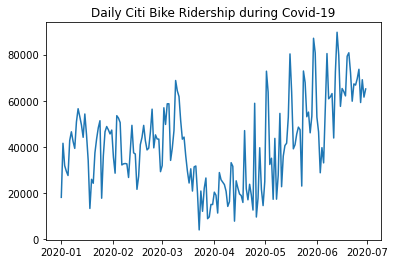

In [43]:
# First pass at graph
plt.plot(citibike2020daily_totals.date, citibike2020daily_totals.daily_bikes)
plt.title('Daily Citi Bike Ridership during Covid-19')
#plt.savefig('/Users/melanieackerman/Metis/Week 2/ridership_plot.jpg')

In [44]:
citibike2020daily_totals.describe()

,daily_bikes
count,182.000000
mean,41257.186813
std,18657.029457
min,3999.000000
25%,26077.250000
50%,40940.000000
75%,53297.250000
max,89690.000000


In [45]:
citibike2019daily_totals['daily_MA'] = citibike2019daily_totals['daily_bikes'].rolling(7).mean()
citibike2020daily_totals['daily_MA'] = citibike2020daily_totals['daily_bikes'].rolling(7).mean()
citibike2021daily_totals['daily_MA'] = citibike2021daily_totals['daily_bikes'].rolling(7).mean()

In [46]:
citibike2020daily_totals.head(10)

,date,daily_bikes,daily_MA
0,2020-01-01,18114,NaN
1,2020-01-02,41556,NaN
2,2020-01-03,31873,NaN
3,2020-01-04,29436,NaN
4,2020-01-05,27589,NaN
5,2020-01-06,42738,NaN
6,2020-01-07,46535,33977.285714
7,2020-01-08,42400,37446.714286
8,2020-01-09,39344,37130.714286
9,2020-01-10,50800,39834.571429


In [47]:
# Check if any others are missing
citibike2021daily_totals.daily_MA.isna().describe() # only first 6 are missing

count       180
unique        2
top       False
freq        174
Name: daily_MA, dtype: object

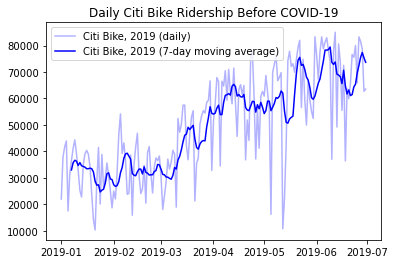

In [65]:
plt.plot(citibike2019daily_totals.date, citibike2019daily_totals.daily_bikes, color='b', alpha=0.3)
plt.plot(citibike2019daily_totals.date, citibike2019daily_totals.daily_MA, color='b')
plt.title('Daily Citi Bike Ridership Before COVID-19')
plt.legend(['Citi Bike, 2019 (daily)', 'Citi Bike, 2019 (7-day moving average)'])
plt.savefig('/Users/melanieackerman/Metis/Project 1 MTA/Figures/citibike_2019.jpg')

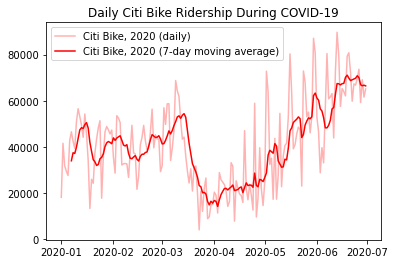

In [66]:
plt.plot(citibike2020daily_totals.date, citibike2020daily_totals.daily_bikes, color='r', alpha=0.3)
plt.plot(citibike2020daily_totals.date, citibike2020daily_totals.daily_MA, color='r')
plt.title('Daily Citi Bike Ridership During COVID-19')
plt.legend(['Citi Bike, 2020 (daily)', 'Citi Bike, 2020 (7-day moving average)'])
plt.savefig('/Users/melanieackerman/Metis/Project 1 MTA/Figures/citibike_2020.jpg')

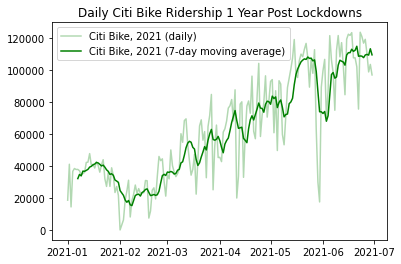

In [67]:
plt.plot(citibike2021daily_totals.date, citibike2021daily_totals.daily_bikes, color='g', alpha=0.3)
plt.plot(citibike2021daily_totals.date, citibike2021daily_totals.daily_MA, color='g')
plt.title('Daily Citi Bike Ridership 1 Year Post Lockdowns')
plt.legend(['Citi Bike, 2021 (daily)', 'Citi Bike, 2021 (7-day moving average)'])
plt.savefig('/Users/melanieackerman/Metis/Project 1 MTA/Figures/citibike_2021.jpg')

In [51]:
citibike2021daily_totals.describe()

,daily_bikes,daily_MA
count,180.000000,174.000000
mean,62476.522222,62347.660920
std,33019.713573,29483.200086
min,249.000000,15426.428571
25%,34626.000000,36833.964286
50%,58950.500000,57044.285714
75%,92946.750000,82276.821429
max,123492.000000,114759.000000


In [52]:
citibike2020daily_totals.describe()

,daily_bikes,daily_MA
count,182.000000,176.000000
mean,41257.186813,41040.633929
std,18657.029457,14727.074753
min,3999.000000,14176.857143
25%,26077.250000,31137.892857
50%,40940.000000,41321.642857
75%,53297.250000,50666.357143
max,89690.000000,71090.571429


## Percent Changes

In [53]:
citibike2019daily_totals['day'] = citibike2019daily_totals['date'].apply(lambda r:r.day)
citibike2019daily_totals['month'] = citibike2019daily_totals['date'].apply(lambda r:r.month)
citibike2019daily_totals.head()

,date,daily_bikes,daily_MA,day,month
0,2019-01-01,21962,NaN,1,1
1,2019-01-02,37797,NaN,2,1
2,2019-01-03,41676,NaN,3,1
3,2019-01-04,43922,NaN,4,1
4,2019-01-05,17432,NaN,5,1


In [54]:
citibike2021daily_totals['day'] = citibike2021daily_totals['date'].apply(lambda r:r.day)
citibike2021daily_totals['month'] = citibike2021daily_totals['date'].apply(lambda r:r.month)
citibike2021daily_totals.head()

,date,daily_bikes,daily_MA,day,month
0,2021-01-01,18790,NaN,1,1
1,2021-01-02,41195,NaN,2,1
2,2021-01-03,14578,NaN,3,1
3,2021-01-04,36745,NaN,4,1
4,2021-01-05,38525,NaN,5,1


In [55]:
citibike2019daily_totals.dtypes

date            object
daily_bikes      int64
daily_MA       float64
day              int64
month            int64
dtype: object

In [56]:
citibike2019daily_totals['month'] = citibike2019daily_totals['month'].astype(str)
citibike2019daily_totals['day'] = citibike2019daily_totals['day'].astype(str)
citibike2019daily_totals['month_day'] = (citibike2019daily_totals['month'] + '-' + citibike2019daily_totals['day'])
citibike2019daily_totals.head()

,date,daily_bikes,daily_MA,day,month,month_day
0,2019-01-01,21962,NaN,1,1,1-1
1,2019-01-02,37797,NaN,2,1,1-2
2,2019-01-03,41676,NaN,3,1,1-3
3,2019-01-04,43922,NaN,4,1,1-4
4,2019-01-05,17432,NaN,5,1,1-5


In [57]:
citibike2021daily_totals['month'] = citibike2021daily_totals['month'].astype(str)
citibike2021daily_totals['day'] = citibike2021daily_totals['day'].astype(str)
citibike2021daily_totals['month_day'] = (citibike2021daily_totals['month'] + '-' + citibike2021daily_totals['day'])
citibike2021daily_totals.head()

,date,daily_bikes,daily_MA,day,month,month_day
0,2021-01-01,18790,NaN,1,1,1-1
1,2021-01-02,41195,NaN,2,1,1-2
2,2021-01-03,14578,NaN,3,1,1-3
3,2021-01-04,36745,NaN,4,1,1-4
4,2021-01-05,38525,NaN,5,1,1-5


In [58]:
citibike_19_21_df = pd.merge(citibike2019daily_totals, citibike2021daily_totals, on='month_day')

In [59]:
citibike_19_21_df.head()

,date_x,daily_bikes_x,daily_MA_x,day_x,month_x,month_day,date_y,daily_bikes_y,daily_MA_y,day_y,month_y
0,2019-01-01,21962,NaN,1,1,1-1,2021-01-01,18790,NaN,1,1
1,2019-01-02,37797,NaN,2,1,1-2,2021-01-02,41195,NaN,2,1
2,2019-01-03,41676,NaN,3,1,1-3,2021-01-03,14578,NaN,3,1
3,2019-01-04,43922,NaN,4,1,1-4,2021-01-04,36745,NaN,4,1
4,2019-01-05,17432,NaN,5,1,1-5,2021-01-05,38525,NaN,5,1


In [60]:
def get_pct_change(row):
    pct_chng = (row['daily_bikes_y'] - row['daily_bikes_x'])/row['daily_bikes_x']
    return pct_chng

citibike_19_21_df['pct_chng'] = citibike_19_21_df.apply(get_pct_change, axis=1)
citibike_19_21_df.head()

,date_x,daily_bikes_x,daily_MA_x,day_x,month_x,month_day,date_y,daily_bikes_y,daily_MA_y,day_y,month_y,pct_chng
0,2019-01-01,21962,NaN,1,1,1-1,2021-01-01,18790,NaN,1,1,-0.144431
1,2019-01-02,37797,NaN,2,1,1-2,2021-01-02,41195,NaN,2,1,0.089901
2,2019-01-03,41676,NaN,3,1,1-3,2021-01-03,14578,NaN,3,1,-0.650206
3,2019-01-04,43922,NaN,4,1,1-4,2021-01-04,36745,NaN,4,1,-0.163403
4,2019-01-05,17432,NaN,5,1,1-5,2021-01-05,38525,NaN,5,1,1.210016


In [61]:
import numpy as np

In [62]:
# Create column of zeros for the graph
citibike_19_21_df['zeros'] = citibike_19_21_df['date_x'].isna()
citibike_19_21_df.head()

,date_x,daily_bikes_x,daily_MA_x,day_x,month_x,month_day,date_y,daily_bikes_y,daily_MA_y,day_y,month_y,pct_chng,zeros
0,2019-01-01,21962,NaN,1,1,1-1,2021-01-01,18790,NaN,1,1,-0.144431,False
1,2019-01-02,37797,NaN,2,1,1-2,2021-01-02,41195,NaN,2,1,0.089901,False
2,2019-01-03,41676,NaN,3,1,1-3,2021-01-03,14578,NaN,3,1,-0.650206,False
3,2019-01-04,43922,NaN,4,1,1-4,2021-01-04,36745,NaN,4,1,-0.163403,False
4,2019-01-05,17432,NaN,5,1,1-5,2021-01-05,38525,NaN,5,1,1.210016,False


In [63]:
# Create moving average
citibike_19_21_df['pct_chng_MA'] = citibike_19_21_df['pct_chng'].rolling(7).mean()

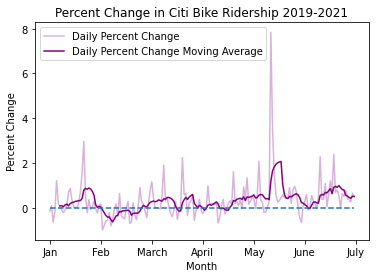

In [68]:
plt.plot(citibike_19_21_df.month_day, citibike_19_21_df.pct_chng, color='purple', alpha=0.3)
plt.xticks(np.arange(0, len(citibike_19_21_df.month_day)+1, 30), ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July'])
plt.plot(citibike_19_21_df.month_day, citibike_19_21_df.pct_chng_MA, color='purple')
plt.plot(citibike_19_21_df.month_day, citibike_19_21_df.zeros, linestyle='--')
plt.xlabel('Month')
plt.ylabel('Percent Change')
plt.title('Percent Change in Citi Bike Ridership 2019-2021')
plt.legend(['Daily Percent Change', 'Daily Percent Change Moving Average'])
plt.savefig('/Users/melanieackerman/Metis/Project 1 MTA/Figures/citibike_pctchng.jpg')

In [73]:
citibike_2021_df.describe()

,daily_bikes
count,11245774.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0
